In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df=pd.read_csv('price.csv')

In [36]:
df.tail()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
13126,397405,Highland Township,Gettysburg,Adams,PA,13127,1280.0,1280.0,1284.0,1284.0,...,1442,1440,1419,1409,1398,1395,1384,1368,1342,1321
13127,398292,Town of Wrightstown,Green Bay,Brown,WI,13128,639.0,650.0,668.0,694.0,...,1114,1133,1136,1124,1090,1047,1012,1004,1018,1047
13128,398343,Urbana,Corning,Steuben,NY,13129,1433.0,1431.0,1437.0,1458.0,...,1595,1611,1612,1607,1609,1619,1627,1625,1625,1624
13129,398839,Angels,NaN,Calaveras,CA,13130,1516.0,1529.0,1529.0,1515.0,...,1514,1528,1534,1525,1526,1529,1541,1553,1558,1563
13130,737788,Lebanon Borough,New York,Hunterdon,NJ,13131,1759.0,1784.0,1787.0,1786.0,...,1970,1982,1973,1958,1934,1929,1949,1993,2034,2057


Above dataframe shows a list of rent prices from 2011 until 2017 in various cities across the US. Below exercise will do some exploratory data analysis for the data set.

In [6]:
df.columns

Index(['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank',
       'November 2010', 'December 2010', 'January 2011', 'February 2011',
       'March 2011', 'April 2011', 'May 2011', 'June 2011', 'July 2011',
       'August 2011', 'September 2011', 'October 2011', 'November 2011',
       'December 2011', 'January 2012', 'February 2012', 'March 2012',
       'April 2012', 'May 2012', 'June 2012', 'July 2012', 'August 2012',
       'September 2012', 'October 2012', 'November 2012', 'December 2012',
       'January 2013', 'February 2013', 'March 2013', 'April 2013', 'May 2013',
       'June 2013', 'July 2013', 'August 2013', 'September 2013',
       'October 2013', 'November 2013', 'December 2013', 'January 2014',
       'February 2014', 'March 2014', 'April 2014', 'May 2014', 'June 2014',
       'July 2014', 'August 2014', 'September 2014', 'October 2014',
       'November 2014', 'December 2014', 'January 2015', 'February 2015',
       'March 2015', 'April 2015', 'May 2015',

We can view the columns in the dataset to see the time interval of rent prices recorded

In [7]:
df.isna().sum(axis=0)

City Code             0
City                  0
Metro              1232
County                0
State                 0
Population Rank       0
November 2010      1783
December 2010      1783
January 2011       1783
February 2011      1631
March 2011         1458
April 2011         1409
May 2011           1399
June 2011          1399
July 2011          1399
August 2011        1399
September 2011     1397
October 2011       1383
November 2011      1383
December 2011      1162
January 2012       1162
February 2012      1162
March 2012         1162
April 2012            0
May 2012              0
June 2012             0
July 2012             0
August 2012           0
September 2012        0
October 2012          0
                   ... 
August 2014           0
September 2014        0
October 2014          0
November 2014         0
December 2014         0
January 2015          0
February 2015         0
March 2015            0
April 2015            0
May 2015              0
June 2015       

We can see if there are any NA's in the dataset. To do so, let's filter for NA's using isna method and then summing the counts of NA values in each column

In [8]:
df_cleaned=df.dropna(axis=1,how='any')

In [9]:
df_cleaned.isna().sum()

City Code          0
City               0
County             0
State              0
Population Rank    0
April 2012         0
May 2012           0
June 2012          0
July 2012          0
August 2012        0
September 2012     0
October 2012       0
November 2012      0
December 2012      0
January 2013       0
February 2013      0
March 2013         0
April 2013         0
May 2013           0
June 2013          0
July 2013          0
August 2013        0
September 2013     0
October 2013       0
November 2013      0
December 2013      0
January 2014       0
February 2014      0
March 2014         0
April 2014         0
                  ..
August 2014        0
September 2014     0
October 2014       0
November 2014      0
December 2014      0
January 2015       0
February 2015      0
March 2015         0
April 2015         0
May 2015           0
June 2015          0
July 2015          0
August 2015        0
September 2015     0
October 2015       0
November 2015      0
December 2015

In [10]:
dates=df_cleaned.iloc[:,5:]

First thing I want to do is look at the median and average rent price in aggregae for each month and each year. The above code splits the dataset so that we are only working with the columns which have dates and rent values. We drop all other columns

In [11]:
dates.head()

,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,2183,2186,2190,2192,2189,2189,2185,2183,2186,2194,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,1494,1496,1493,1491,1491,1498,1509,1513,1517,1514,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,1200,1199,1197,1193,1193,1197,1201,1203,1199,1201,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,1091,1092,1094,1096,1095,1092,1090,1089,1087,1083,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [12]:
medians=dates.median(axis=0)
medians=medians.to_frame()
medians.columns=['Median']

In [13]:
average=dates.mean(axis=0)
average=average.to_frame()
average.columns=['Average']

We can calculate the mean and median rent prices for each month of each year to see if there is a trend in the data.

In [14]:
timeseries_median=medians.iloc[0:56,:]
timeseries_average=average.iloc[0:56,:]

In [15]:
timeseries_average

,Average
April 2012,1321.113700
May 2012,1322.932907
June 2012,1323.985607
July 2012,1324.170436
August 2012,1323.780367
September 2012,1323.750362
October 2012,1325.199452
November 2012,1328.291295
December 2012,1330.215901
January 2013,1332.096261


The above code shows what the "average" dataframe looks like. The "median" dataframe will also have the same value. The ultimate goal is plot both the median and mean rent prices over time to visualzie the trend.

In [16]:
time_series_median_graph=pd.Series(timeseries_median['Median'].values,index=pd.date_range('04/01/2012',periods=56,freq='M'))
time_series_average_graph=pd.Series(timeseries_average['Average'].values,index=pd.date_range('04/01/2012',periods=56,freq='M'))

<function matplotlib.pyplot.legend>

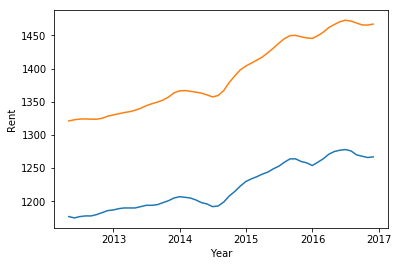

In [18]:
plt.plot(time_series_median_graph,label='Median')
plt.plot(time_series_average_graph,label='Average')
plt.xlabel('Year')
plt.ylabel('Rent')

plt.legend

Here we can see the orange line is the average rent price over time and the blue line is the median rent price. Without plotting distributions, we can assume the distribution of rent across all cities and time is heavily right skewed (mean rent is greater than median rent). It is important we make a distinction about the dataset in case we need to use either the mean or median later. In this case, we would be best served to use the median.

In [19]:
df_cleaned['Growth']=(df_cleaned['January 2017']-df_cleaned['April 2012'])/df_cleaned['April 2012']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_cleaned.head()

In [20]:
ten_largest=df_cleaned.nlargest(10,'Growth')

In [21]:
ten_largest.head()

,City Code,City,County,State,Population Rank,April 2012,May 2012,June 2012,July 2012,August 2012,...,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017,Growth
12352,27005,Sea Island,Glynn,GA,12353,6008,6110,6237,6327,6381,...,9697,9623,9697,9891,10351,10749,11078,11246,11490,0.912450
895,30527,Bonita Springs,Lee,FL,896,1435,1469,1500,1535,1560,...,2403,2422,2423,2412,2412,2432,2464,2509,2568,0.789547
587,17040,Bismarck,Burleigh,ND,588,968,968,977,988,1002,...,1578,1580,1568,1564,1561,1610,1652,1683,1695,0.751033
11370,33396,Peshastin,Chelan,WA,11371,1012,1030,1063,1106,1145,...,1474,1490,1497,1508,1517,1528,1608,1698,1771,0.750000
12780,4721,Fisher Island,Miami-Dade,FL,12781,8842,8812,8850,8934,8957,...,13836,14181,14478,14735,15007,15193,15271,15159,14971,0.693169


The above lines of code calculates the total growth in rent prices from April 2012 until January 2017 for each city. We can then identify the top 10 cities of rent growth over the time period and see if they perhaps share any geopgraphic locations

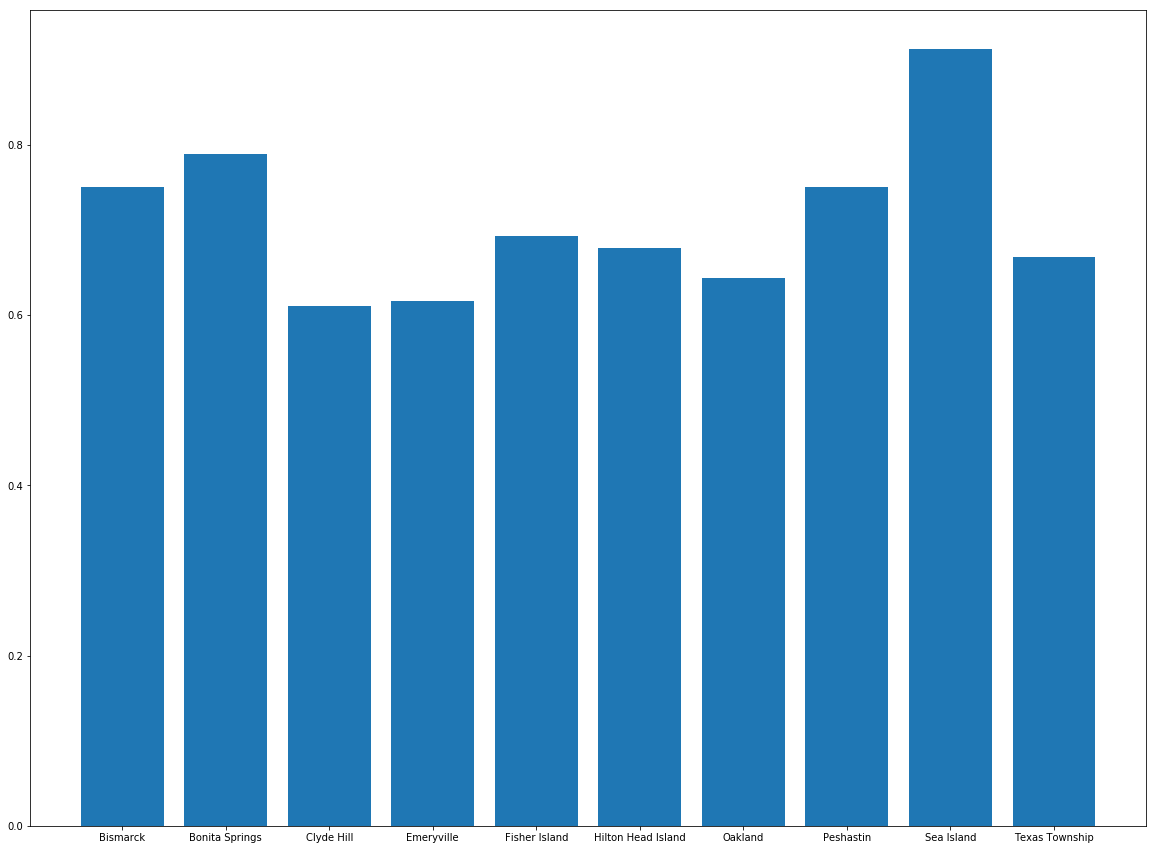

In [31]:
plt.figure(figsize=(20,15))
plt.bar(ten_largest['City'],ten_largest['Growth'])
plt.show()

In [32]:
ten_smallest=df_cleaned.nsmallest(10,'Growth')

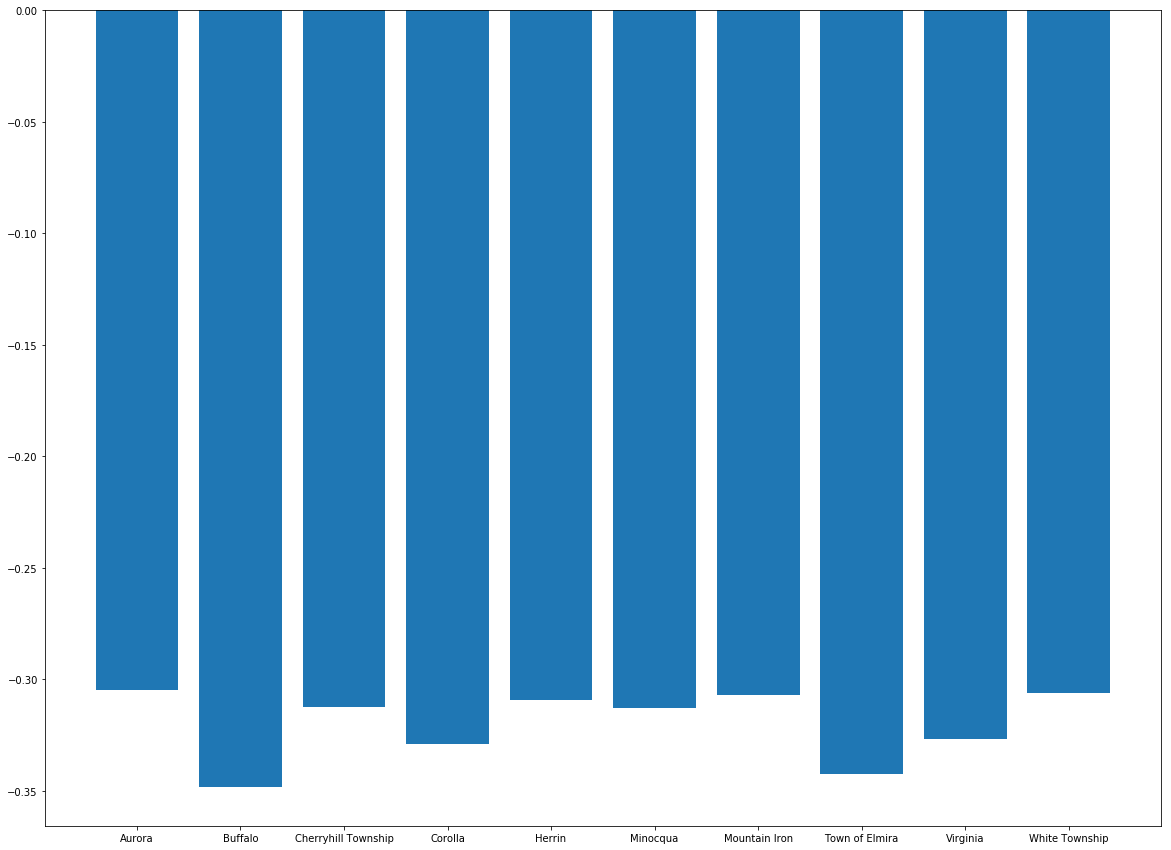

In [33]:
plt.figure(figsize=(20,15))
plt.bar(ten_smallest['City'],ten_smallest['Growth'])
plt.show()

We can also do the same thing for cities with the lowest amount of growth over the same time period.